# Homework 3: Random Variables and Their Distributions
***

**Name**: Markus Hudobnik

**Section**: 002
***

This assignment is due on Moodle by **5pm on Friday October 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math

import scipy.stats
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import binom
%matplotlib inline

### [15 points] Problem 1 
***

A young boy and an old woman are playing [tic tac toe](https://en.wikipedia.org/wiki/Tic-tac-toe). Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The boy plays first and randomly places an X in an open square. The woman plays next, and randomly places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, the probability that the boy wins.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely don't be afraid to write helper functions that get called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an $X$ or an $O$ on an free square, or (iii) check if someone has one the game. This problem will not be autograded so feel free to get creative.  Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [25]:
def choose_number():
    return np.random.randint(0,9)

In [26]:
def old_woman(board):
    #select a random number and place it on the board
    n = choose_number()
    if board[n] == "X" or board[n] == "O":
        #check until the right interval
        old_woman(board)
    else:
        board[n] = "O"
    return board

In [27]:
def boy(board):
#select a random number and place it on the board
    n = choose_number()
    if board[n] == "X" or board[n] == "O":
        #check until the right interval
        boy(board)
    else:
        board[n] = "X"
    return board

In [28]:
def game_status(board):
    count = 0
    #winning combinations, for loop checks for three in a row
    for a,b,c in ((0, 1, 2), (6, 7, 8), (3, 4, 5), (0, 3, 6), (0, 4, 8), (1, 4, 7), (2, 5, 8), (2, 4, 6)):
        #player one wins
        if board[a] == board[b] == board[c] == "X":
            #print("boy")
            return "boy"
        #player two wins
        if board[a] == board[b] == board[c] == "O":
            #print("old woman")
            return "old woman"
            
    #check for a tie...?
    #checks if all 9 spaces are fill, but no winner
    for x in range(9):
        if board[x] == "X" or board[x] == "O":
            count += 1
        if count == 9:
            #print("tie")
            return "tie"
            


In [29]:
def tic_tac_toe():
    #draw a board
    board = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    winner = "jjj"

    #run check on the board to check if someone wins
    for a in range(9):  
        boy(board)
        if game_status(board) == "tie":
            winner = "tie"
            break
        if game_status(board) == "boy":
            winner = "boy"
            break
            
        old_woman(board)
        if game_status(board) == "tie":
            winner = "tie"
            break
        if game_status(board) == "old woman":
            winner = "old woman"
            break
        
    return winner

In [30]:
def prob_of_boy_winning(chance,num_trials=9000):
    boy = np.array([tic_tac_toe() for boy in range(num_trials)])
    return np.sum(boy == chance) / num_trials

In [31]:
tic_tac_toe()

'boy'

In [32]:
print(prob_of_boy_winning("boy"))
print(prob_of_boy_winning("old woman"))
print(prob_of_boy_winning("tie"))

0.587111111111
0.288333333333
0.124333333333


The boy has the  edge because he gets to go first! I created a for loop that loops 9 times, for the nine turns they will play. I then let boy function go, checking the values of the game, then moving on to old womans turn. I added recursion to simplify. Before, it would just skip entirely if it picked the same random number. I could optimize this more and simplify it a lot but it works!


I double checked my numbers with googling "chance of tic-tac-toe". My numbers match those of the probability, of player 1, player 2, and tying. 

### [20 points] Problem 2 
***

Let $X$ be the lifespan (in years) of a BF Goodrich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cx^2} & 1 \leq x \leq 10 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

$$1= \int_{1}^{10} \frac{10}{cx^2} dx$$  
$$= \left. \frac{1}{c} * \frac{-10}{x}\right|_{1}^{10}$$    
$$= (\frac{1}{c} * \frac{-10}{10})-(\frac{1}{c} * \frac{-10}{1})$$

$$c=9$$


**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

$$F(y)= \int_{1}^{10} \frac{10}{cy^2} dy$$  
$$= \left. \frac{1}{c} * \frac{-10}{y}\right|_{1}^{x}$$    
$$= (\frac{1}{9} * \frac{-10}{y})-(\frac{1}{9} * \frac{-10}{1})$$   
$$= \frac{-10}{9y} -\frac{-10}{9}$$



**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 8 years without failing. 

The lifespan of 8 years plugged in from the cdf above gives us $$\frac{-10}{9(8)} -\frac{-10}{9} = .972$$   
And since this calculates the probability of chance to fail, taking $1-.972$ will give us the chance not to fail which is $1-.972 = 0.028$, which is $2.8\%$, since $P(chance to fail) + P(chance not to fail) = 1$.

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $90\%$ of all tires will need to be replaced. In other words, determine the 90th percentile of the distribution of $X$. 

Since we have $\frac{-10}{9x} -\frac{-10}{9}$, we set that equal to the percentile, which is 0.9.

$$\frac{-10}{9x} -\frac{-10}{9} = .9$$

then solve for x,

$$\frac{9}{10}=\frac{-10}{9x} -\frac{-10}{9}$$  
mulitply by 9,   
$$8.1=\frac{-10}{x} +10$$  

$$x=5.263$$

So $5.263$ years is considered the 90th percentile

**Part E**: What is the probability that all four BF Goodrich Rugged Trail T/A tires on a vehicle last longer than 8 years without failing? 

The probability would be the four tires multiplied because they are all dependent events. Therefore, $0.028*0.028*0.028*0.028 = 6.146x10^{-7}$ which is an extrememly small chance that your all 4of your tires will last longer 8 years!

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [33]:
def pmf_natural(x):
    if x in range(1,9+1):
        return math.log10(((x+1)/x))
    return 

In [34]:
total = 0
for x in range(1,9+1):
    total = pmf_natural(x) + total

print(total)

1.0


As you can see, it looks like the pmf equals 1.0 which is in fact exactly what the pmf should be doing when all the parts are added up, as the pmf solves for the probablity. So yes, it is a well-defined pmf.

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

In [35]:
pmff = np.array([pmf_natural(x) for x in range(0,9+1)])
dud = []
pmfArray=[]

for x in range(1,9+1):
    pmfx = pmf_natural(x)
    pmfArray.append(pmfx)
    
for x in range(1,9+1):
    one_game = 1/9
    dud.append(one_game)
index = [1,2,3,4,5,6,7,8,9]
print(pmfArray)
print(dud)

[0.3010299956639812, 0.17609125905568124, 0.12493873660829993, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]


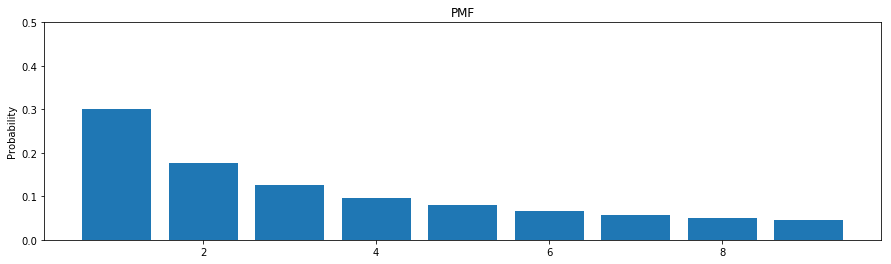

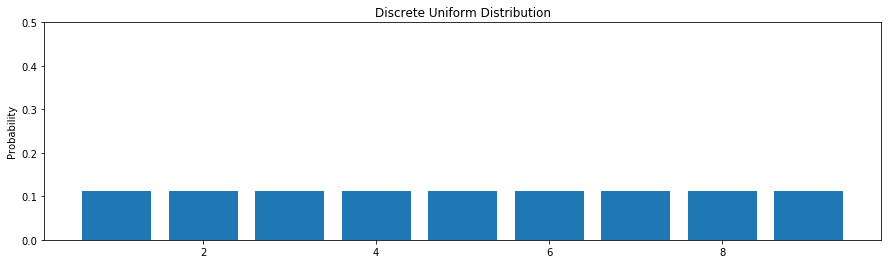

In [36]:
ind = index  # the x locations for the groups

fig, ax = plt.subplots(figsize=(15,4))
plt.bar(ind,pmfArray)
ax.set_ylabel('Probability')
ax.set_title('PMF')
ax.set_ylim([0,0.5])

fig, ax = plt.subplots(figsize=(15,4))
plt.bar(ind,dud)
ax.set_ylabel('Probability')
ax.set_title('Discrete Uniform Distribution')
ax.set_ylim([0,0.5])
plt.show()

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [37]:
def cdf_natural(y):
    result = 0
    for x in range(1,y+1):
        result += math.log10(((x+1)/x))
    return result 

In [38]:
print ("cdf = {0:0f}".format(cdf_natural(4)))

print ("{0:.4f}%".format(cdf_natural(4) * 100))

cdf = 0.698970
69.8970%


In [39]:
print ("cdf = {0:0f}".format(cdf_natural(5)))

print ("{0:.4f}%".format(cdf_natural(5) * 100))

cdf = 0.778151
77.8151%


In [40]:
print(cdf_natural(5))

0.7781512503836436


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

(0, 0.5)

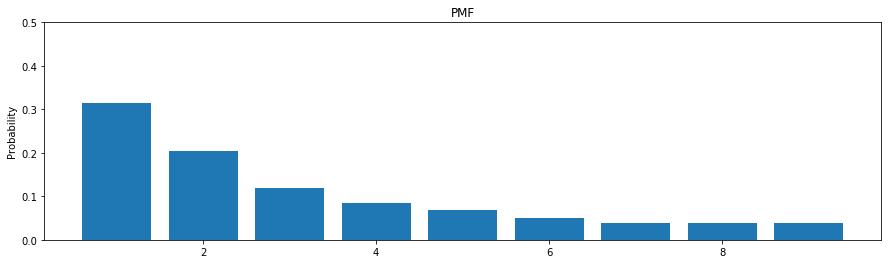

In [41]:
dfIncome = pd.read_csv("tax_data.txt",delimiter="\t")


dfIncome['First'] = dfIncome['Tax Incomes'].astype(str).str[0]

dfIncome['First'] = dfIncome['First'].astype(int)

dfArray = []
total=dfIncome['First'].count()
for x in range(1,9+1):
    num = dfIncome['First'][dfIncome['First'] == x].count()
    
    dfArray.append(num/total)

ind = index 

fig, ax = plt.subplots(figsize=(15,4))
plt.bar(ind,dfArray)
ax.set_ylabel('Probability')
ax.set_title('PMF')
ax.set_ylim([0,0.5])

After taking the occurances of each number in the set and finding the % of the total numbers, I plotted the graph and it looks identical to the pmf I did in part B. My conclusion is that this data set is valid. It consists of naturally occurring numbers because it matches the above pmf of naturally occurring numbers. The exact numbers are are little bit off, but the difference is small (the code below shows) and still follows the same path. 

In [42]:
np.subtract(dfArray,pmfArray)

array([ 0.01277541,  0.02881231, -0.00667289, -0.01121187, -0.01003359,
       -0.01703503, -0.01864406, -0.01348064, -0.00741267])

### [25 points] Problem 4 
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 20 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(20)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

I would expect that it would have a poisson distribution, like we learned in class espiecially if the time between independetn events is exponential

**Part B**:  What is the probability that 25 boats cross under the bridge on a particular day?

Using the poisson distribution formula, we get:
    
$$ \lambda = 20 $$

$$ P(25 boats in a day)= \frac{\lambda^{k}e^{-\lambda}}{k!} = \frac{20^{25}e^{-20}}{25!}$$

$$=0.04459$$

**Part C**:  What is the probability that 15 boats or fewer cross under the bridge on a particular day?

$$ \lambda = 20 $$

$$ P(25 boats in a day)= \frac{\lambda^{k}e^{-\lambda}}{k!} = \frac{20^{15}e^{-20}}{15!}$$

$$=0.05165$$

In [43]:
def prob_of_k_lower(k):
    lam = 20
    total=0
    for x in range(1,k+1):
        total += ((lam**x)*(math.exp(-lam)))/(math.factorial(x))
    
    
    return total

In [44]:
prob_of_k_lower(15)

0.1565131325785894

**Part D**: What is the probability that between 1 and 2 hours pass between two boat crossings? 

We can take the CDF and use it here. 
$$P(X<=\Delta t) = 1-P(0)$$

$$F(\Delta t)=1-e^{-\lambda \Delta t}$$

Since the difference is 1 hour and there are 24 hours in a day this gives us the fraction of $\frac{1}{24}$. but we have to subtract it from $\frac{2}{24}$, for 2 hours in the day

$$F(\frac{2}{24})=1-e^{-20(\frac{2}{24})}$$

$$F(\frac{1}{24})=1-e^{-20(\frac{1}{24})}$$

$$F(\frac{2}{24})-F(\frac{1}{24})=.246$$

**Part F**: Write a function boat_count that takes as it's sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function.  

In [45]:
def boat_count(lam):
    boatNum = 0
    time = 0
    while (time <= 1):
        time += np.random.exponential(1/lam)
        boatNum +=1
        
    return boatNum-1

In [46]:
boat_count(20)

24

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 15 boats or fewer cross under the bridge on a particular day. For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function.  

In [47]:
def boat_count_sim(lam, num_days=int(1e3)):
    count = 0
    for x in range(1,num_days):
        num = boat_count(20)
        if num<=15:
            count+=1
            
    return count/num_days

In [48]:
boat_count_sim(20)

0.157

Yes, it agrees with Part C!

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 1 and 2 hours apart.  For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  


In [49]:
def boat_time_sim(lam, num_boats=int(1e3)): 
    count=0
    for x in range(1,num_boats+1):
        num = np.random.exponential(1/lam)
        if (num >= (1/24)) and (num <= (2/24)):
            count+=1
    return count/num_boats 

In [50]:
boat_time_sim(20)

0.228

It does agree with my Part D!

### [20 points] Problem 5 
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


The Probability would be 
$$P(8 games) = C(7,5) * (0.55^6) * (0.45^2) = 0.1177 = 11.77\%$$

I did this from taking the combination of 5 games in 7, then calculated the final win which will also end the game, by doing an extra ()

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

Using the above formula, and applying it to $P(7),P(8),P(9),P(10),P(11)$ (we ignore $P(1)-P(5)$ as they are all $0$)

we get

$$P(BB wins) = (0.0277 + 0.0747 + 0.1177 + 0.1412 + 0.143 + 0.1287) = 0.633 = 63.3\%$$

You can also calculate the binomial distribution by a slightly altered function from above

$$P(k) = C(n,k) * p^k * (1-p)^{n-k}$$

for example from the probability at 6 games out of 11

$$P(6) = C(11,6) * (0.55^6) * (0.45^5)= 0.236$$
$$...$$
$$P(11) = C(11,11) * (0.55^{11}) * (0.45^0)= 0.0014$$

Adding all of those up gets you $$0.632 = 63.2\%$$ 

**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

Expected payout would be

$$P(BB wins) = (0.1176 + 0.2117 + 0.2227 + 0.1779 + 0.12 + 0.072) = 0.9219$$

then,

$$0.9219(9,400)=\$8665.86$$

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


The trade offs would be:

short - Less money will be made, higher risk. Less money you are losing out from paying Bob, but you will get a lower payout. 

long - The longer the series, the more likely to lose money because you have to pay per game won as well, which will add up the more games there are. 

Basically, it goes from short games to long games with earning more money on each game until it evens out (roughly) getting the best and most money (Id say around 20 ish games), then getting lower and lower. At game 99, you woul only take home around $\$5000$, because you have to give Bob $\$5000$ for winning 50 games

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [54]:

def binomial_D(n,p):
    k=np.arange(int(n/2)+1,n+1)
    binomial = scipy.stats.binom.pmf(k,n,p)
    return np.sum(binomial)

def optimal_series(p):
    EV=[]
    G=[]
    best_ratio =0
    n = 3
    for x in range(3,101,2):
        #print(n)
        #print(binomial_D(x,p))
        #print(binomial_D(x,p)*(10000 -(int(x/2)+1)*100))
        #print((int(x/2)+1)*100)
        #print("-----------") 
        one = binomial_D(x,p)
        one_game = (one*(10000 -(int(x/2)+1)*100))
       
        n+=2
        G.append(n)
        EV.append(one_game)
       
   
    #print("Optimal Series length: {0:d}".format(
    print(G[np.argmax(EV)])
   # print("Highest Expected Payout: ${0:2f}".format(np.amax(EV)))
    plt.subplots(figsize=(15,4))
    plt.plot(G, EV, 'o-')
    plt.title('Expected Payout vs. # of Games', fontsize=15)
    plt.xlabel('Number of Games', fontsize=15)
    plt.ylabel('Expected Payout ($)', fontsize=15)
    plt.ylim([100,10000])
    plt.xlim([3,99])
    return 1

13


1

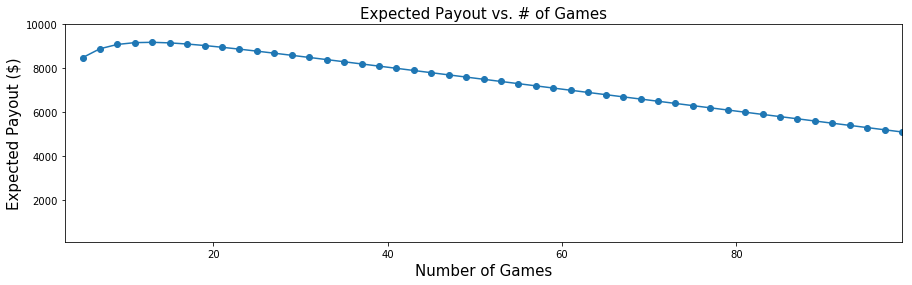

In [55]:
optimal_series(0.77)

### Challenge Problem - Which Geyser Gushes First? 
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You arrive at the beautiful Three Geysers National Park. You read a placard explaining that the three eponymous geysers — creatively named $A$, $B$ and $C$ — erupt at intervals of precisely two hours, four hours and six hours, respectively. However, you just got there, so you have no idea how the three eruptions are staggered. Assuming they each started erupting at some independently random point in history, what are the probabilities that A, B and C, respectively, will be the first to erupt after your arrival?
